In [1]:
# Sparkling wine sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
df_1=pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\Sparkling.csv')
df_1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df_2 = pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)

In [5]:
print(df_2.head())
print('\n')
print(df_2.tail())

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64


YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [219]:
date=pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [220]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_1.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [221]:
df = df_1.set_index('Time_Stamp',)
df.drop('YearMonth',axis=1,inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [8]:
# Plotting the time series for 'Sparkling' wine sales

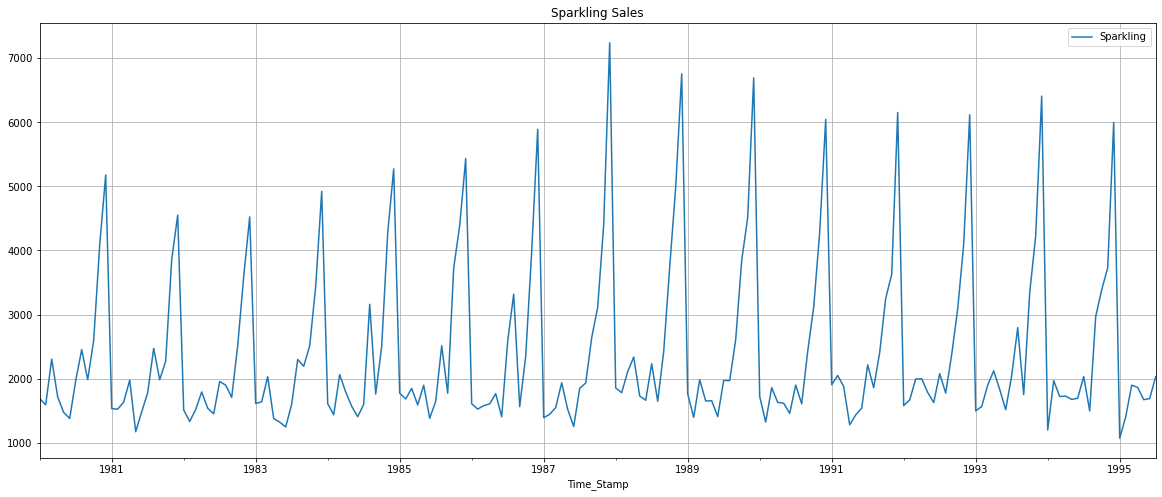

In [222]:
df.plot(figsize=(20,8))
plt.grid()
plt.title("Sparkling Sales")
plt.show()

# Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [223]:
# Checking null values for 'Sparkling' wine sales
df.isnull().sum()

Sparkling    0
dtype: int64

In [224]:
# Descriptive Analysis of 'Sparkling' Wine Sales
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [225]:
# Plotting Boxplot for year wise
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

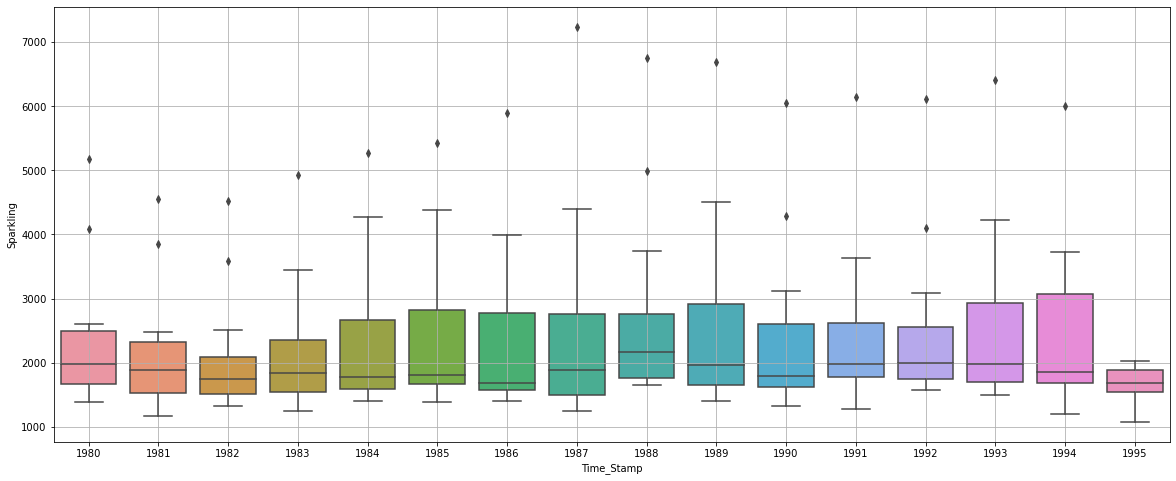

In [226]:
sns.boxplot(x=df.index.year,y=df['Sparkling'])
plt.grid();

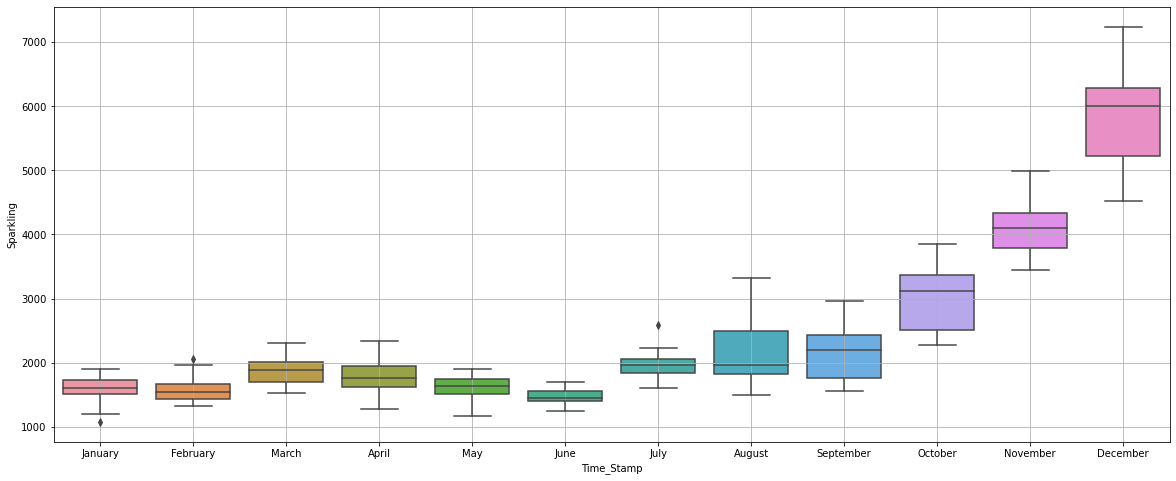

In [227]:
# Plotting Boxplot for Month wise

sns.boxplot(x=df.index.month_name(),y=df['Sparkling'])
plt.grid();


In [17]:
# Plotting the Sparkling wine year month wise sales - Line plot

In [228]:
monthly_sales_across_years=pd.pivot_table(df,values='Sparkling',columns=df.index.month_name(),index=df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


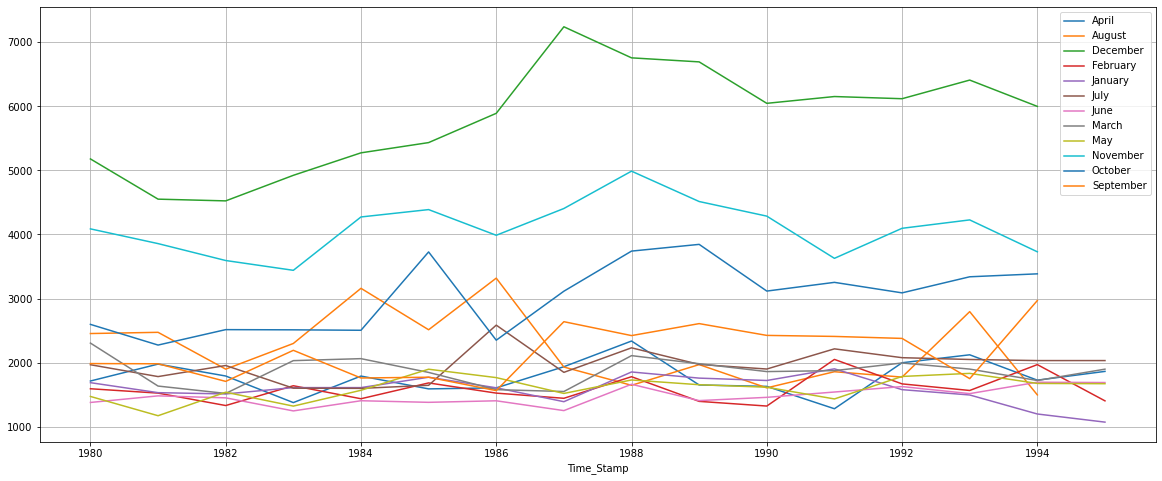

In [229]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [20]:
# Plotting a month plot to check the sales in different years and withing different month across

In [230]:
## importing the month plot from statsmodels
from statsmodels.graphics.tsaplots import month_plot

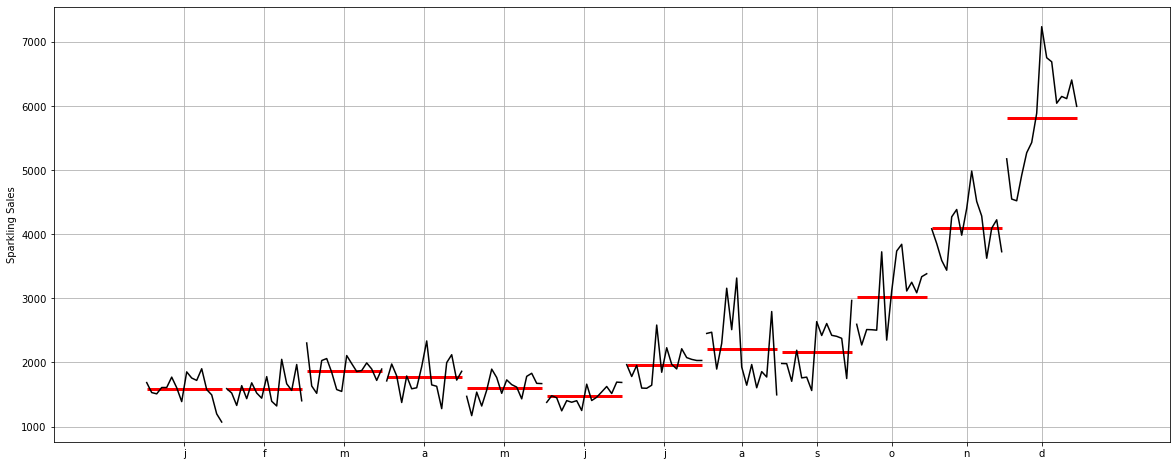

In [231]:
month_plot(df['Sparkling'],ylabel='Sparkling Sales')
plt.grid();

In [23]:
# Plot the Empirical Cumulative Distribution

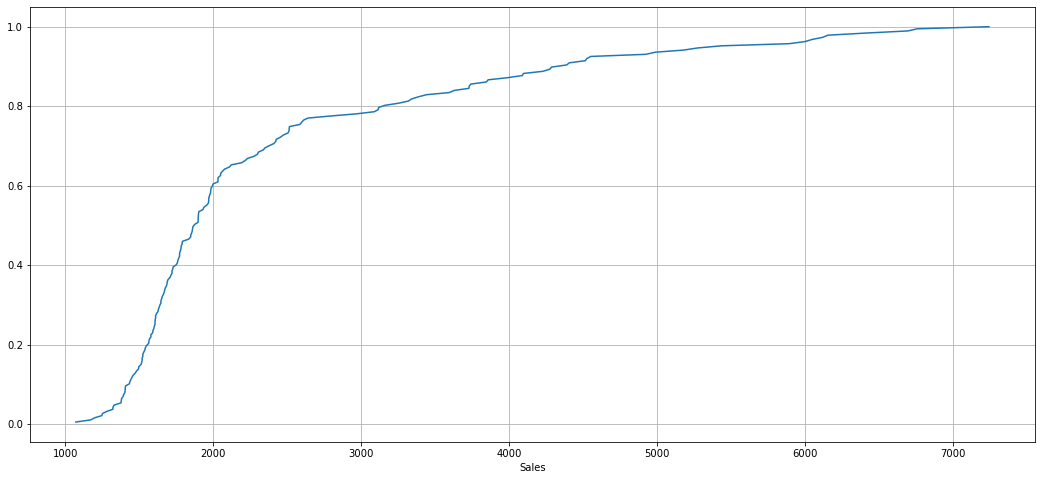

In [232]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [233]:
# Plot the average Sparkling Wine Sales per month and the month on month percentage change of Sparkling Wine Sales

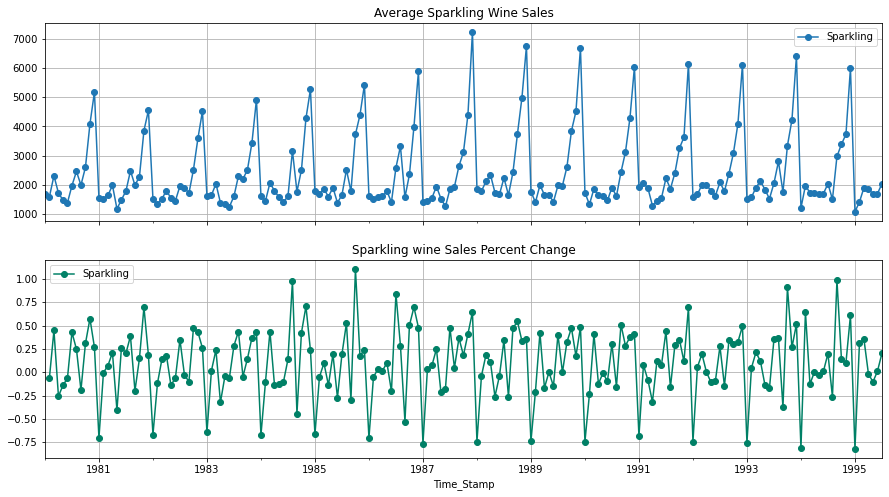

In [234]:
# group by date and get average Sparkling wine Sales, and precent change
average = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average Sparkling wine Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rpse Wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling wine Sales Percent Change",grid=True)

In [27]:
# Decomposing the time series into Additive decomposition and plot

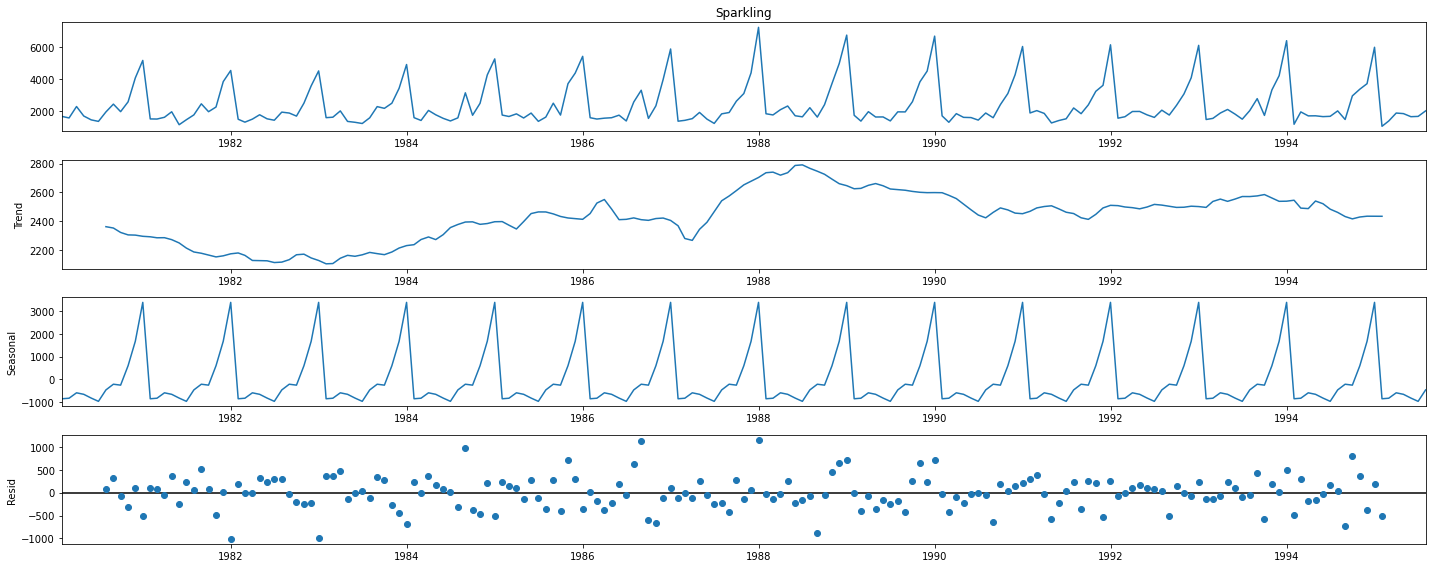

In [235]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sparkling'],model='Additive')
decomposition.plot();

In [236]:
trend= decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [30]:
#Decomposing the time series into multiplicative decomosition and plot

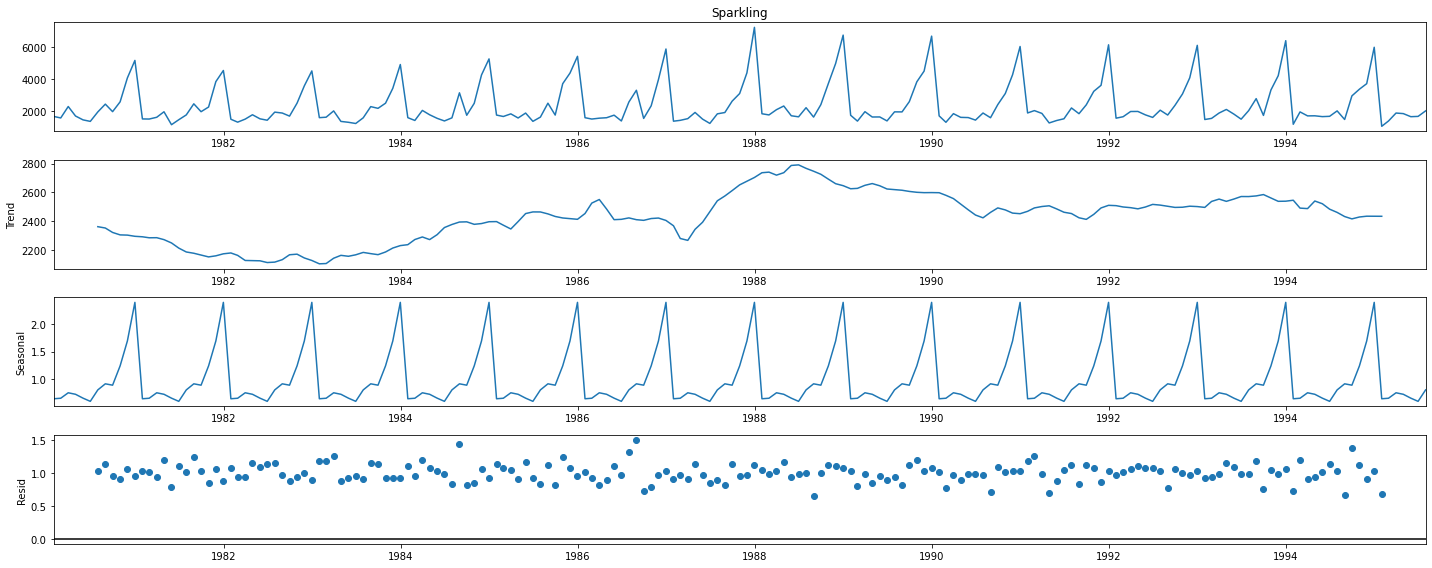

In [237]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [238]:
trend= decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

# Q3.Split the data into training and test. The test data should start in 1991.


In [33]:
# Splitting the data into train and test data

In [239]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [240]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [241]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [242]:
# Checking the shape of the train and test data
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


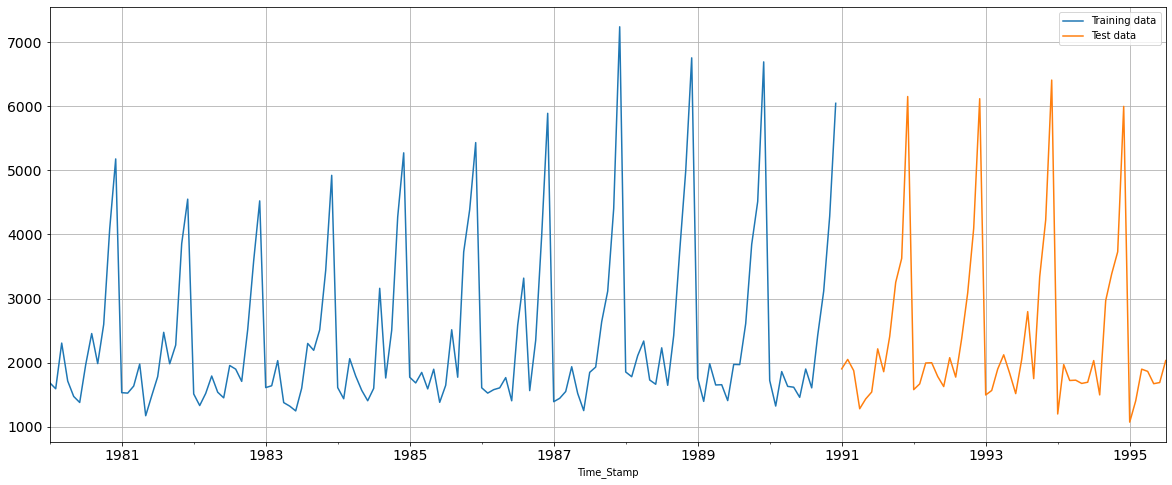

In [243]:
# plotting the graph for train and test set

train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training data','Test data'])
plt.show()

# Q4). Build various exponential smoothing models on the training data and evaluate the model usingRMSE on the test data. Other models such as regression,naïve forecast models and simple averagemodels. should also be built on the training data and check the performance on the test data using RMSE

In [244]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [245]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [246]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
lr = LinearRegression()

In [249]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

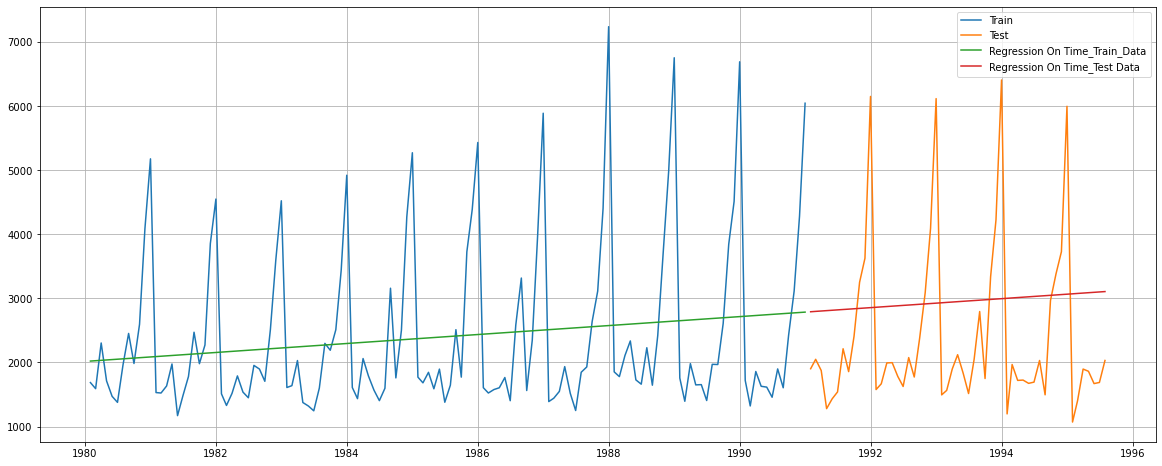

In [250]:
# Plotting Linear Regression Forecast
train_predictions_model1= lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']=test_predictions_model1
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'],label='Regression On Time_Train_Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [46]:
# Model 1 Evaluation:

In [251]:
### Defining Accuacy Matrix]
from sklearn import metrics
from math import sqrt

In [48]:
# Train - RMSE score

In [252]:
rmse_model1_train = sqrt(metrics.mean_squared_error(train['Sparkling'],train_predictions_model1))
print("For RegressionOnTime forecast on the Train Data, RMSE is %3.3f" %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data, RMSE is 1279.322


In [50]:
# Test - RMSE score

In [253]:
rmse_model1_test = sqrt(metrics.mean_squared_error(test['Sparkling'],test_predictions_model1))
print("For RegressionOnTime forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data, RMSE is 1389.135


In [52]:
# Creating Dataframe

In [254]:
result_DF=pd.DataFrame({'Train_RMSE':[rmse_model1_train],'Test_RMSE':[rmse_model1_test]},index=['RegressionOnTime'])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175


In [255]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [256]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [257]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

In [57]:
# Plotting Naive Forecast

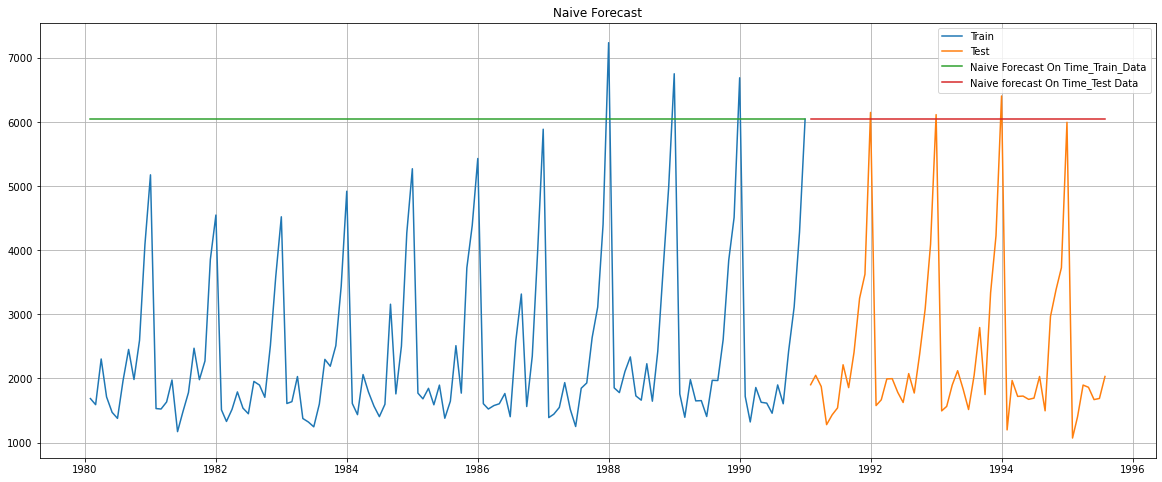

In [258]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'],label='Naive Forecast On Time_Train_Data')
plt.plot(NaiveModel_test['naive'], label='Naive forecast On Time_Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid();

In [59]:
# Model 2 Evaluation

In [259]:
# Train - RMSE score
rmse_model2_train = sqrt(metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive']))
print("For Naive Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model2_train))

For Naive Model forecast on the Train Data, RMSE is 3867.701


In [260]:
# Test-RMSE score
rmse_model2_test = sqrt(metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive']))
print("For Naive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test))

For Naive Model forecast on the Test Data, RMSE is 3864.279


In [62]:
# Creating Dataframe

In [261]:
result_DF_2=pd.DataFrame({'Train_RMSE':[rmse_model2_train],'Test_RMSE':[rmse_model2_test]},index=['Naive Model'])
result_DF=pd.concat([result_DF,result_DF_2])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352


In [262]:
SimpleAverage_Train=train.copy()
SimpleAverage_Test=test.copy()

In [263]:
SimpleAverage_Train['mean_forecast']= train['Sparkling'].mean()
SimpleAverage_Train.head()

,Sparkling,mean_forecast
Time_Stamp,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [264]:
SimpleAverage_Test['mean_forecast']= train['Sparkling'].mean()
SimpleAverage_Test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


In [265]:
# Plotting Simple Average Forecast

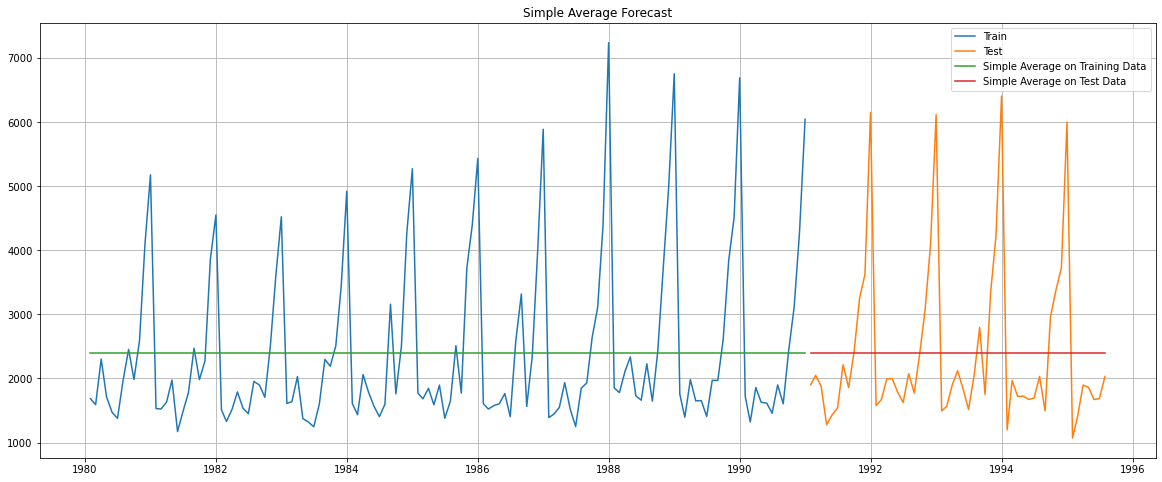

In [266]:
plt.plot(SimpleAverage_Train['Sparkling'], label='Train')
plt.plot(SimpleAverage_Test['Sparkling'], label='Test')
plt.plot(SimpleAverage_Train['mean_forecast'],label='Simple Average on Training Data')
plt.plot(SimpleAverage_Test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [69]:
# Model 3 Evaluation

In [267]:
# Train - RMSE score
rmse_model3_train = sqrt(metrics.mean_squared_error(train['Sparkling'],SimpleAverage_Train['mean_forecast']))
print("For Simple Average forecast on the Train Data, RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Train Data, RMSE is 1298.484


In [268]:
# Test - RMSE score
rmse_model3_test = sqrt(metrics.mean_squared_error(test['Sparkling'],SimpleAverage_Test['mean_forecast']))
print("For Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data, RMSE is 1275.082


In [72]:
# Creating DataFrame

In [269]:
result_DF_3=pd.DataFrame({'Train_RMSE':[rmse_model3_train],'Test_RMSE':[rmse_model3_test]},index=['Simple Average'])
result_DF=pd.concat([result_DF,result_DF_3])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804


In [270]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [271]:
# Trailing Moving Averages
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


In [76]:
# Plotting Moving Average Forecast

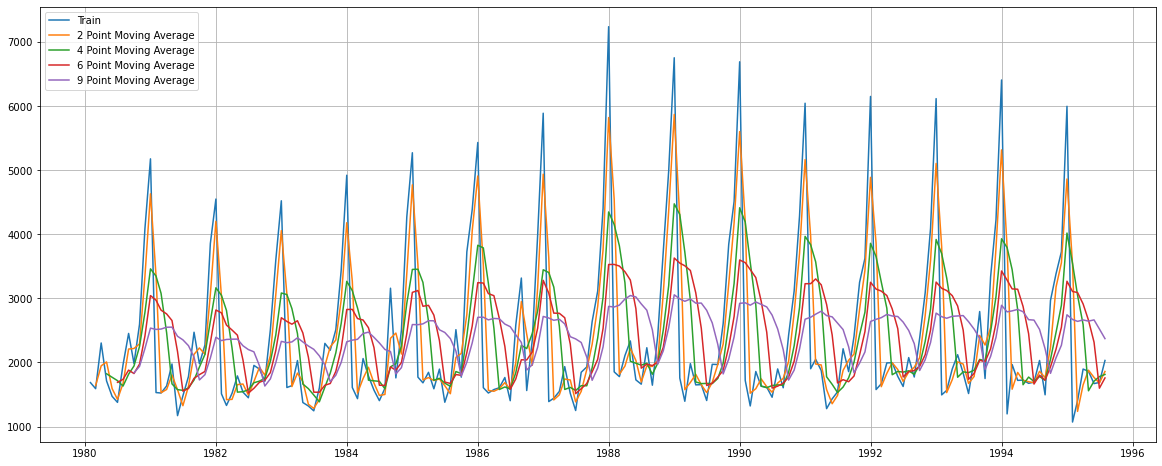

In [272]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [273]:
# Creating Train and Test set

trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)]
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [79]:
# Plotting Grpah for Trailing MA

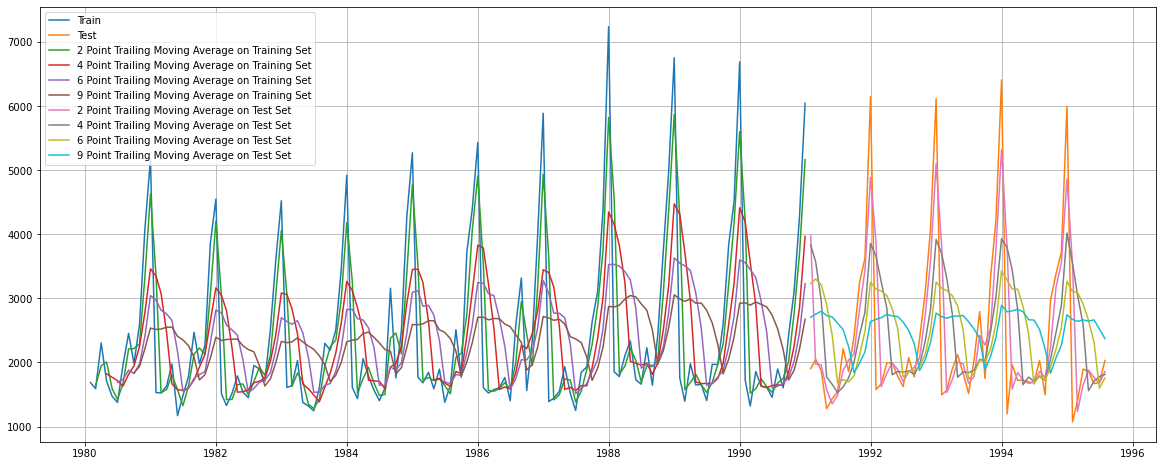

In [274]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [81]:
# RMSE score for Trailing MA

In [275]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = sqrt(metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2']))
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))
## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = sqrt(metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4']))
print("For 4 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_4))
## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = sqrt(metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6']))
print("For 6 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_6))
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = sqrt(metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9']))
print("For 9 point Moving Average Model forecast on the Training Data, RMSE is %3.3f " %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Training Data, RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data, RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data, RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data, RMSE is 1346.278 


In [83]:
# Creating Dataframe

In [276]:
resultsDf_4 = pd.DataFrame({'Test_RMSE': [rmse_model4_test_2,rmse_model4_test_4
 ,rmse_model4_test_6,rmse_model4_test_9]}
 ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
 ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
result_DF = pd.concat([result_DF, resultsDf_4])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315


In [277]:
## Importing Simple exponential Smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [278]:
SES_Train=train.copy()
SES_test=test.copy()

In [279]:
model_SES=SimpleExpSmoothing(SES_Train['Sparkling'],)

In [280]:
model_SES_autofit=model_SES.fit(optimized=True,smoothing_level=0.995)

In [281]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [282]:
# Predicting for trainig data

In [283]:
SES_Train['predict'] = model_SES_autofit.fittedvalues
SES_Train.head()

,Sparkling,predict
Time_Stamp,,
1980-01-31,1686,1686.000000
1980-02-29,1591,1686.000000
1980-03-31,2304,1591.475000
1980-04-30,1712,2300.437375
1980-05-31,1471,1714.942187


In [284]:
# Predicting for Test data

In [285]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,6038.165663
1991-02-28,2049,6038.165663
1991-03-31,1874,6038.165663
1991-04-30,1279,6038.165663
1991-05-31,1432,6038.165663


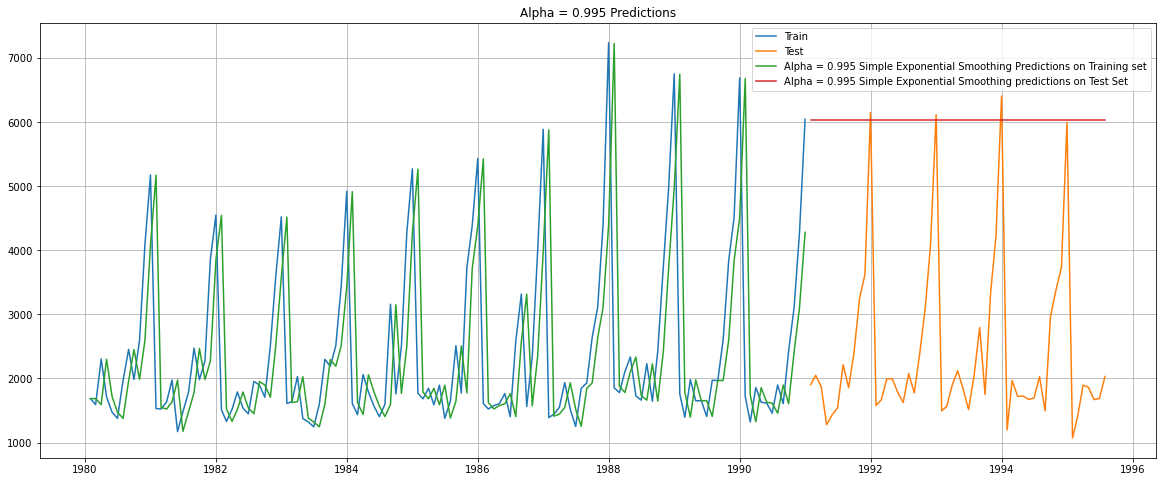

In [286]:
# Plotting graph for Simple Exponential Smooting forecast

plt.plot(SES_Train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_Train['predict'],label='Alpha = 0.995 Simple Exponential Smoothing Predictions on Training set')
plt.plot(SES_test['predict'], label='Alpha = 0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.995 Predictions');

In [287]:
# Train - RMSE score

In [288]:
rmse_model5_Train_1 = metrics.mean_squared_error(SES_Train['Sparkling'],SES_Train['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model5_Train_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Train Data, RMSE is 1372.055


In [289]:
# Test - RMSE score

In [290]:
rmse_model5_Test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_Test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 3855.941


In [291]:
# Creating DataFrame

In [292]:
resultsDf_5 = pd.DataFrame({'Train_RMSE' : [rmse_model5_Train_1],
 'Test_RMSE': [rmse_model5_Test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_5])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897


In [293]:
# Setting Different Alpha Values
resultsDf_6 = pd.DataFrame({'Alpha_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_6

,Alpha_Values,Train_RMSE,Test_RMSE


In [294]:
for i in np.arange(0.3,1,0.1):
 model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
 SES_Train['predict',i] = model_SES_alpha_i.fittedvalues
 SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
 
 rmse_model5_train_i = metrics.mean_squared_error(SES_Train['Sparkling'],SES_Train['predict',i],squared=False)
 
 rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
 
 resultsDf_6 = resultsDf_6.append({'Alpha_Values':i,'Train_RMSE':rmse_model5_train_i
 ,'Test_RMSE':rmse_model5_test_i}, ignore_index=True)

In [295]:
# Model Evaluation

In [296]:
resultsDf_6.sort_values(by=['Test_RMSE'],ascending=True)

,Alpha_Values,Train_RMSE,Test_RMSE
0,0.3,1359.511747,1935.507132
1,0.4,1352.588879,2311.919615
2,0.5,1344.004369,2666.351413
3,0.6,1338.805381,2979.204388
4,0.7,1338.844308,3249.944092
5,0.8,1344.462091,3483.801006
6,0.9,1355.723518,3686.794285


In [105]:
# Plotting graph for different Alpha values of Traninig and Test data

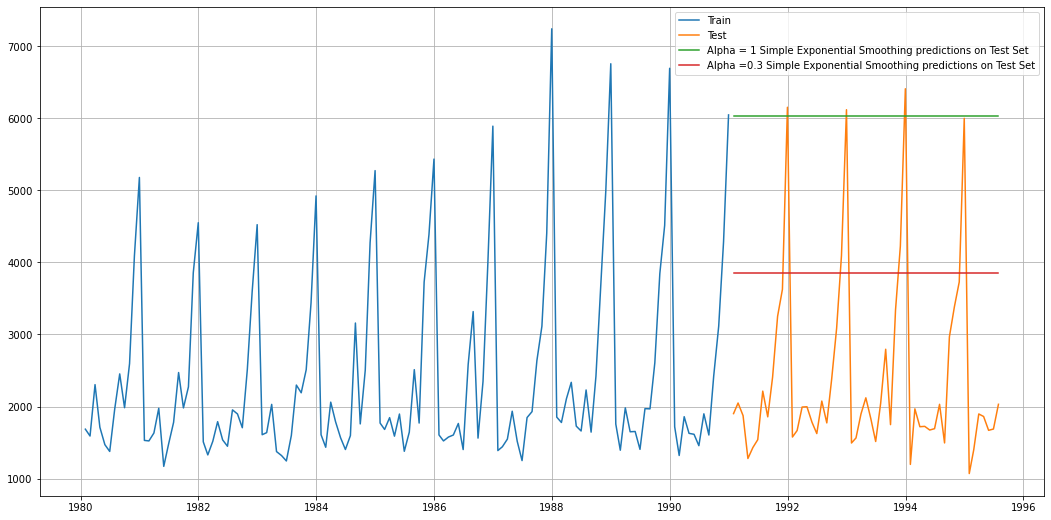

In [297]:
plt.figure(figsize=(18,9))
plt.plot(SES_Train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha = 1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [107]:
# Creating Dataframe

In [298]:
resultsDf_6_1 = pd.DataFrame({'Train_RMSE' : [resultsDf_6.sort_values(by=['Train_RMSE'],ascending=True).values[0][1]],
                              'Test_RMSE': [resultsDf_6.sort_values(by=['Test_RMSE'],ascending=True).values[0][2]]}
 ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_6_1])
result_DF


,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897
"Alpha=0.3,SimpleExponentialSmoothing",1338.805381,1935.507132


In [299]:
# Model 6 : Double Exponential Smoothing

DES_train = train.copy()
DES_test = test.copy()

In [300]:
model_DES = Holt(DES_train['Sparkling'])

In [301]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha_Values':[],'Beta_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_7

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE


In [302]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha_Values':i,'Beta_Values':j,'Train_RMSE':rmse_model6_train,'Test_RMSE':rmse_model6_test}, ignore_index=True)

In [303]:
resultsDf_7

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,1592.292788,18259.110704
1,0.3,0.4,1682.573828,26069.841401
2,0.3,0.5,1771.710791,34401.512440
3,0.3,0.6,1848.576510,42162.748095
4,0.3,0.7,1899.949006,47832.397419
...,...,...,...,...
59,1.0,0.6,1753.402326,49327.087977
60,1.0,0.7,1825.187155,52655.765663
61,1.0,0.8,1902.013709,55442.273880
62,1.0,0.9,1985.368445,57823.177011


In [304]:
resultsDf_7.sort_values(by=['Test_RMSE']).head()

,Alpha_Values,Beta_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,1592.292788,18259.110704
8,0.4,0.3,1569.338606,23878.496940
1,0.3,0.4,1682.573828,26069.841401
16,0.5,0.3,1530.575845,27095.532414
24,0.6,0.3,1506.449870,29070.722592


In [305]:
# Plotting Graph on Both Traning and Test data

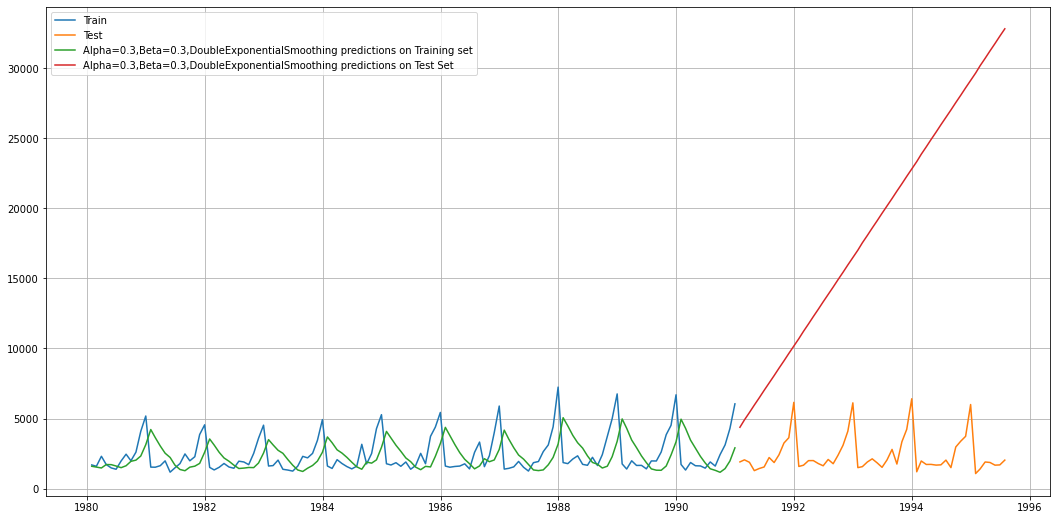

In [306]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [307]:
resultsDf_7_1 = pd.DataFrame({'Train_RMSE' :[resultsDf_7.sort_values(by=['Train_RMSE']).values[0][2]],
 'Test_RMSE': [resultsDf_7.sort_values(by=['Test_RMSE']).values[0][3]]}
 ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_7_1])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897
"Alpha=0.3,SimpleExponentialSmoothing",1338.805381,1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1500.689062,18259.110704


In [308]:
TES_train = train.copy()
TES_test = test.copy()

In [309]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [310]:
model_TES_autofit = model_TES.fit()

In [311]:
model_TES_autofit.params

{'smoothing_level': 0.11057044018305404,
 'smoothing_trend': 0.06076609768412894,
 'smoothing_seasonal': 0.39187601902826213,
 'damping_trend': nan,
 'initial_level': 1621.806699459997,
 'initial_trend': -8.175193580026457,
 'initial_seasons': array([1.07304448, 1.02730389, 1.39469706, 1.20333193, 0.98008967,
        0.97664181, 1.39261648, 1.70888984, 1.37519684, 1.81953245,
        2.82880203, 3.59142504]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [312]:
# Predicton on Train Set

In [313]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
Time_Stamp,,
1980-01-31,1686,1731.498384
1980-02-29,1591,1644.182518
1980-03-31,2304,2211.921279
1980-04-30,1712,1907.144721
1980-05-31,1471,1526.491107


In [314]:
# Prediction on Test set

In [315]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1578.528263
1991-02-28,2049,1336.087202
1991-03-31,1874,1747.686817
1991-04-30,1279,1632.972086
1991-05-31,1432,1525.031468


In [316]:
# Plotting graph using Training set and Test set using autofit

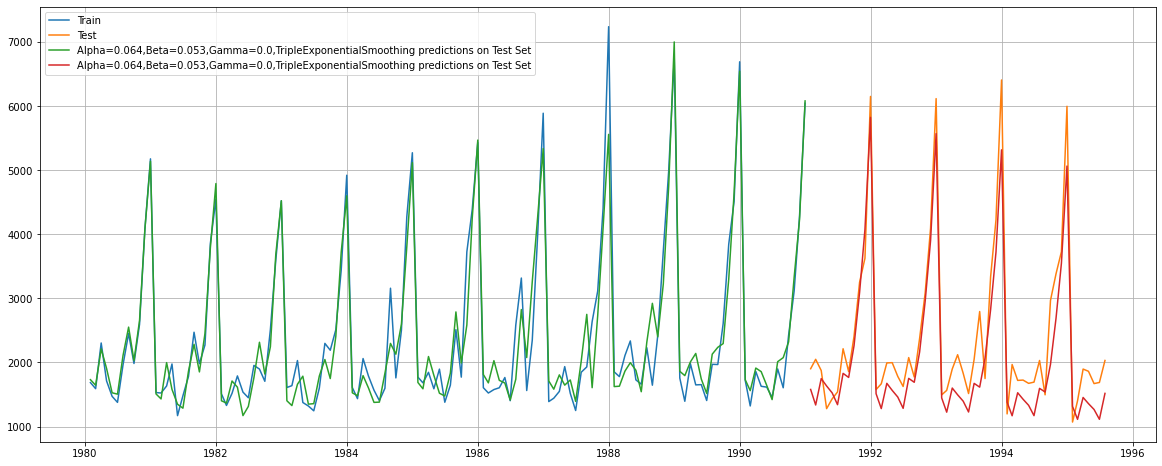

In [317]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set') 
plt.legend(loc='best')
plt.grid();

In [318]:
# Train - RMSE score

In [319]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data, RMSE is %3.3f" %(rmse_model6_train_1))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Train Data, RMSE is 356.782


In [320]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.064,Beta=0.053,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 463.502


In [321]:
# Creating DataFrame

In [322]:
resultsDf_8_1 = pd.DataFrame({'Train_RMSE':[rmse_model6_train_1],
 'Test_RMSE': [rmse_model6_test_1]}
 ,index=['Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_8_1])
result_DF

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897
"Alpha=0.3,SimpleExponentialSmoothing",1338.805381,1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1500.689062,18259.110704


In [323]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha_Values':[],'Beta_Values':[],'Gamma_Values':[],'Train_RMSE':[],'Test_RMSE': []})
resultsDf_8_2

,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE


In [324]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
         for k in np.arange(0.3,1.1,0.1):
                model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
                TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
                TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
                rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
                rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                resultsDf_8_2 = resultsDf_8_2.append({'Alpha_Values':i,'Beta_Values':j,'Gamma_Values':k,
                                                          'Train_RMSE':rmse_model8_train,'Test_RMSE':rmse_model8_test}
                                                          , ignore_index=True)

In [325]:
resultsDf_8_2

,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,0.3,404.513320,3.927862e+02
1,0.3,0.3,0.4,402.088628,9.513202e+02
2,0.3,0.3,0.5,408.282432,1.470487e+03
3,0.3,0.3,0.6,428.631668,2.181724e+03
4,0.3,0.3,0.7,468.958530,3.513351e+03
...,...,...,...,...,...
507,1.0,1.0,0.6,153394.791826,7.989790e+05
508,1.0,1.0,0.7,94040.964958,1.074413e+06
509,1.0,1.0,0.8,102196.953755,5.010607e+06
510,1.0,1.0,0.9,77924.294413,4.318265e+05


In [326]:
resultsDf_8_2.sort_values(by=['Test_RMSE']).head()


,Alpha_Values,Beta_Values,Gamma_Values,Train_RMSE,Test_RMSE
0,0.3,0.3,0.3,404.513320,392.786198
8,0.3,0.4,0.3,424.828055,410.854547
65,0.4,0.3,0.4,435.553595,421.409170
296,0.7,0.8,0.3,700.317756,518.188752
130,0.5,0.3,0.5,498.239915,542.175497


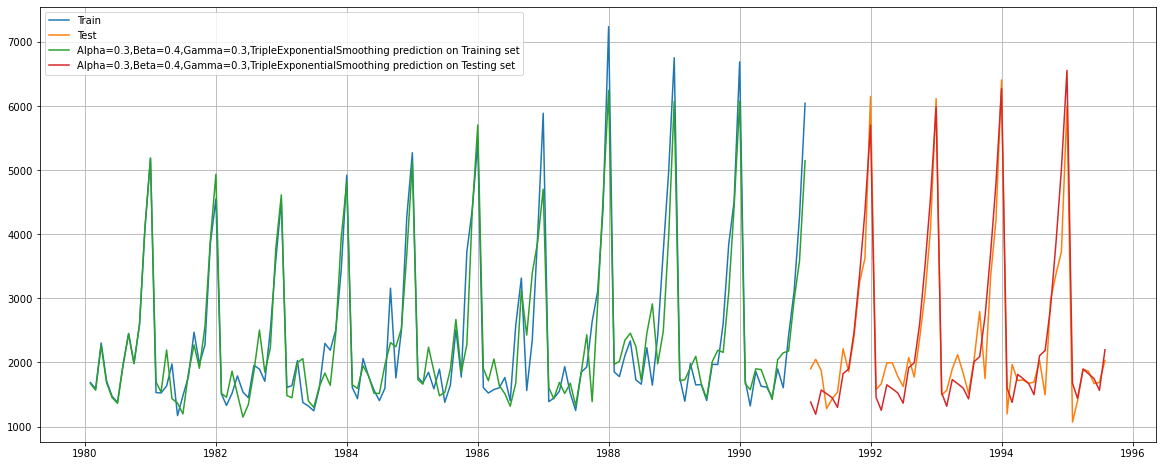

In [327]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing prediction on Training set')
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing prediction on Testing set')
plt.legend(loc='best')
plt.grid();

In [328]:
# Creating Dataframe

In [329]:
resultsDf_8_3 = pd.DataFrame({'Train_RMSE':[resultsDf_8_2.sort_values(by=['Test_RMSE']).values[0][3]],
 'Test_RMSE': [resultsDf_8_2.sort_values(by=['Test_RMSE']).values[0][4]]}
 ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])
result_DF = pd.concat([result_DF, resultsDf_8_3])
result_DF


,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897
"Alpha=0.3,SimpleExponentialSmoothing",1338.805381,1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1500.689062,18259.110704


In [330]:
print('Sorted by RMSE values on Test Data','\n',result_DF.sort_values(by=['Test_RMSE']),'\n','\n')
print('Sorted by RMSE values on Train Data','\n',result_DF.sort_values(by=['Train_RMSE']))

Sorted by RMSE values on Test Data 
                                                      Train_RMSE     Test_RMSE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   404.513320    392.786198
Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponent...   356.782453    463.501976
2pointTrailingMovingAverage                                 NaN    813.400684
4pointTrailingMovingAverage                                 NaN   1156.589694
Simple Average                                      1298.483628   1275.081804
6pointTrailingMovingAverage                                 NaN   1283.927428
9pointTrailingMovingAverage                                 NaN   1346.278315
RegressionOnTime                                    1279.322346   1389.135175
Alpha=0.3,SimpleExponentialSmoothing                1338.805381   1935.507132
Alpha=0.995,SimpleExponentialSmoothing              1372.054747   3855.940897
Naive Model                                         3867.700802   3864.279352
Alpha=0.3,Beta=0.3,DoubleEx

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [331]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std() #determining the rolling standard deviation
    orig = plt.plot(timeseries, color='blue',label='Original')#Plot rolling statistics:
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput,'\n')

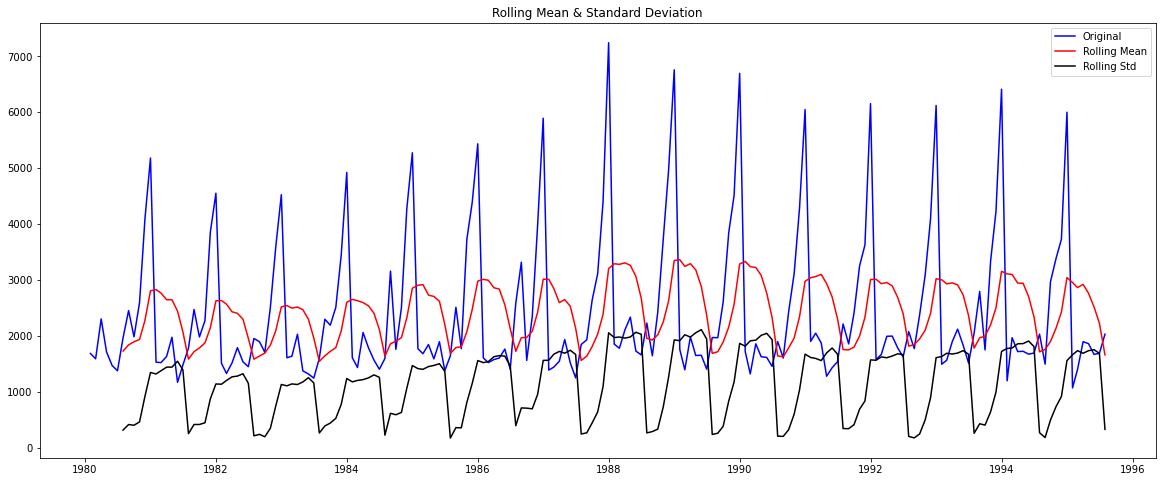

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
dtype: float64 

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
dtype: float64 

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [332]:
test_stationarity(df['Sparkling'])

In [333]:
# Let us take a difference of order 1 and check whether the Time Series is stationary or not.

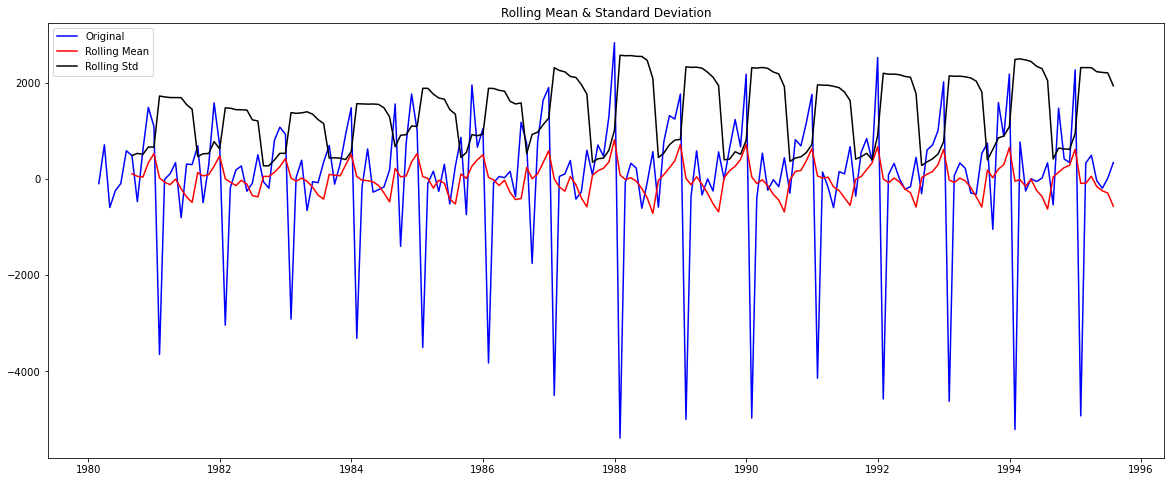

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
dtype: float64 

Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
dtype: float64 

Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [334]:
test_stationarity(df['Sparkling'].diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [335]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [336]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [337]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064368172944
ARIMA(0, 1, 2) - AIC:2232.783097684661
ARIMA(1, 1, 0) - AIC:2268.5280606648653
ARIMA(1, 1, 1) - AIC:2235.0139453501533
ARIMA(1, 1, 2) - AIC:2233.597647119118
ARIMA(2, 1, 0) - AIC:2262.035600095461
ARIMA(2, 1, 1) - AIC:2232.3604898819262
ARIMA(2, 1, 2) - AIC:2210.6185075458225


In [339]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.618508
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [338]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Thu, 28 Oct 2021   AIC                           2232.783
Time:                        19:14:16   BIC                           2244.284
Sample:                    02-29-1980   HQIC                          2237.456
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2472      3.800      1.644      0.100      -1.201      13.696
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

In [158]:
# Predict on the Test Set using this model and evaluate the model.

In [340]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [341]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1417.502239430773


In [342]:
results_DF= pd.DataFrame({'RMSE': [rmse]}
 ,index=['ARIMA(0,1,2)'])
results_DF

,RMSE
"ARIMA(0,1,2)",1417.502239


In [162]:
# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [343]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [344]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [345]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
  

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684684
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023882
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389067
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791512
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158617952
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392081
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956663
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957284665
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838295
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377895
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319656885905
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175527
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085468476
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018829870888
SARIMA(0, 1, 2)x(

In [346]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076770
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340409


In [347]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                         order=(0, 1, 2),
                                         seasonal_order=(2, 0, 2, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
 
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())
  

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -771.561
Date:                            Thu, 28 Oct 2021   AIC                           1557.122
Time:                                    19:16:05   BIC                           1575.632
Sample:                                         0   HQIC                          1564.621
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7771      0.101     -7.680      0.000      -0.975      -0.579
ma.L2         -0.1239      0.121   

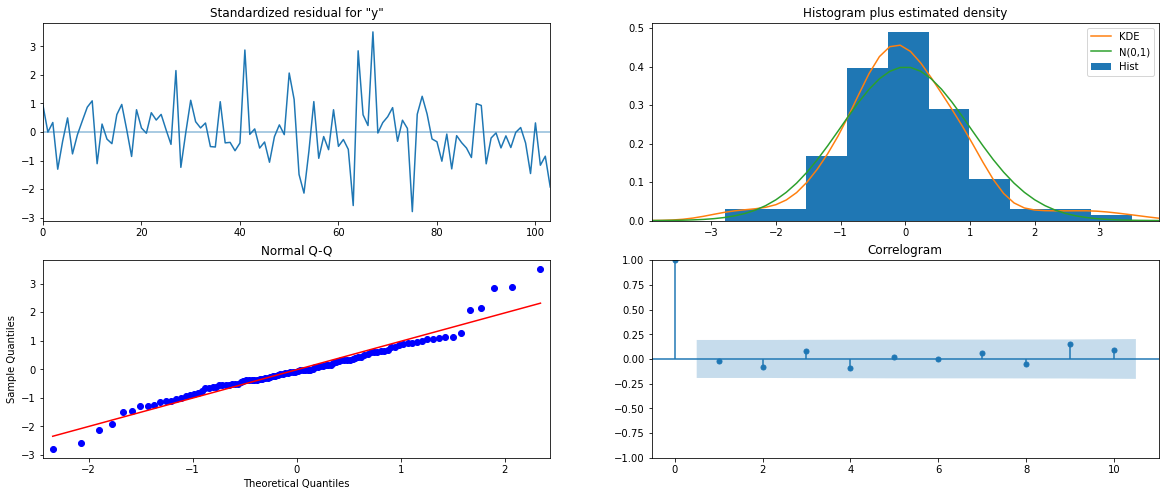

In [348]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [349]:
# Predict on the Test Set using this model and evaluate the model.

In [350]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [351]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1411.356050,397.247686,632.764892,2189.947209
1,1233.062262,407.001539,435.353904,2030.770621
2,1700.192561,408.887836,898.787128,2501.597994
3,1586.559627,410.774963,781.455495,2391.663760
4,1432.380551,412.653828,623.593910,2241.167192


In [352]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

526.4628785794362


In [353]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['SARIMA(0,1,2)(2,0,2,12)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF

,RMSE
"ARIMA(0,1,2)",1417.502239
"SARIMA(0,1,2)(2,0,2,12)",526.462879


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

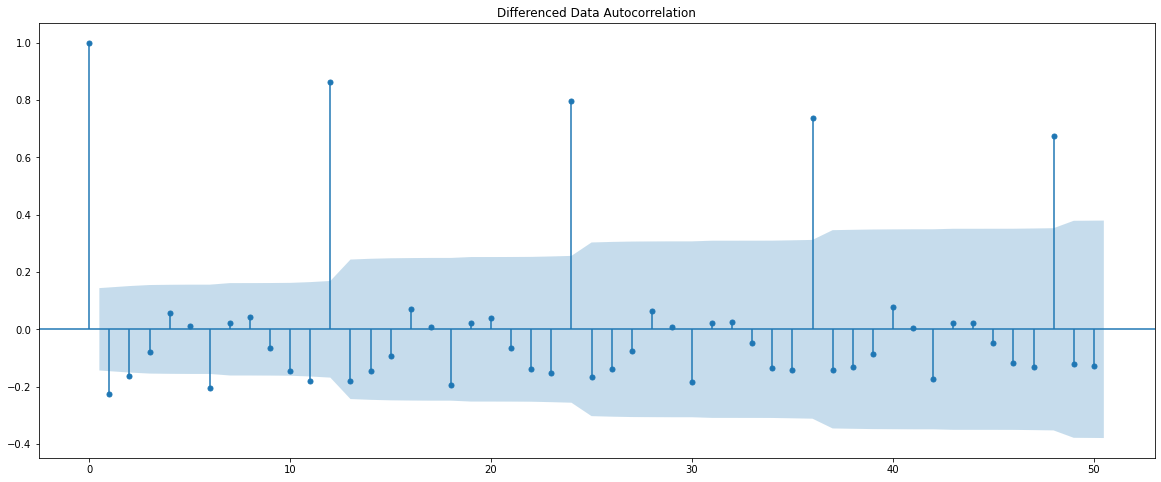

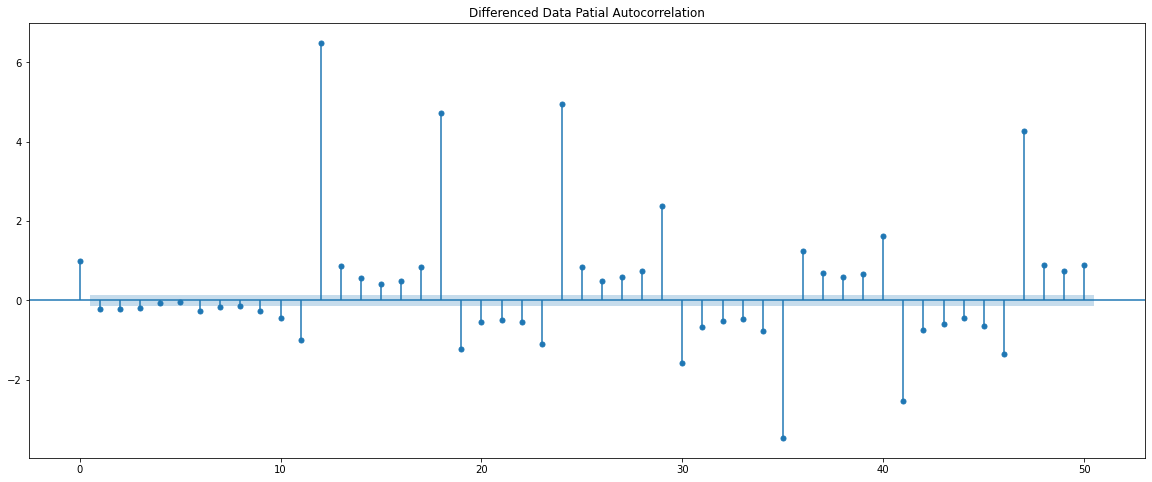

In [354]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

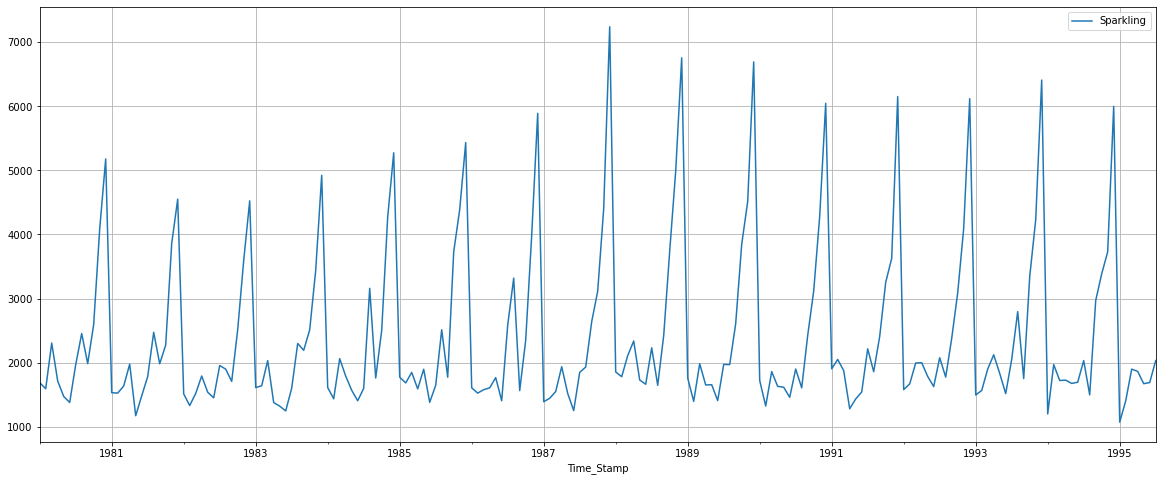

In [355]:
df.plot()
plt.grid();

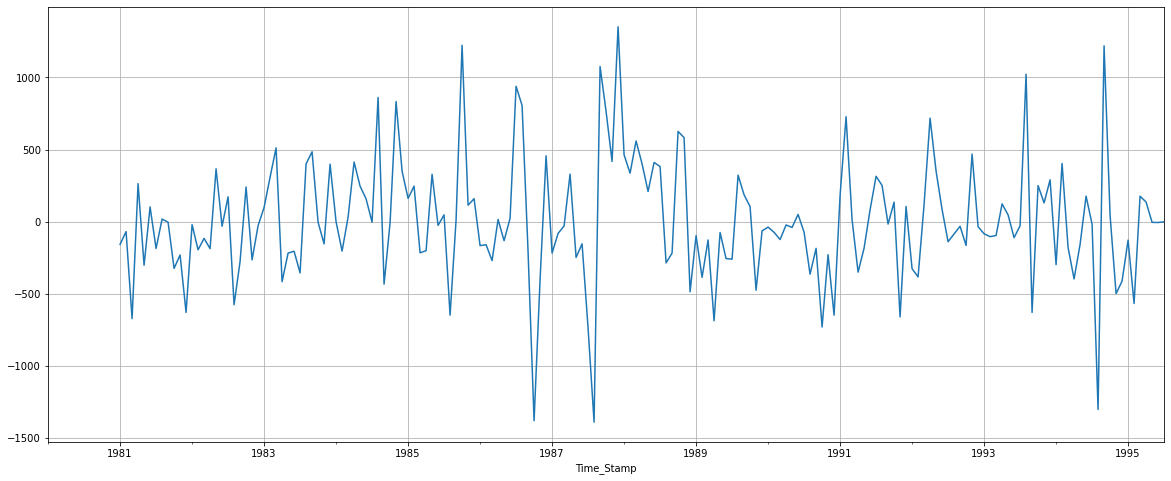

In [356]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

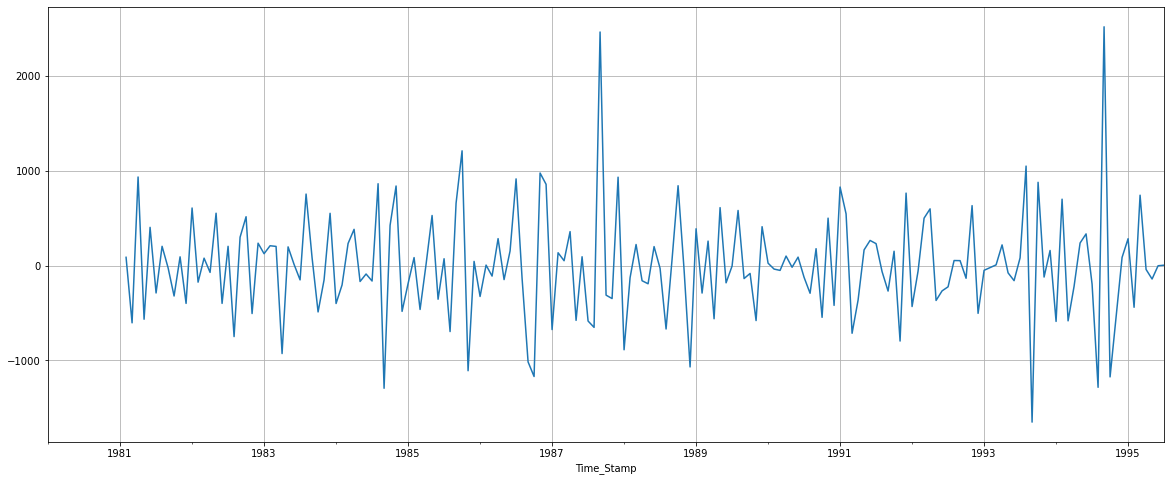

In [357]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

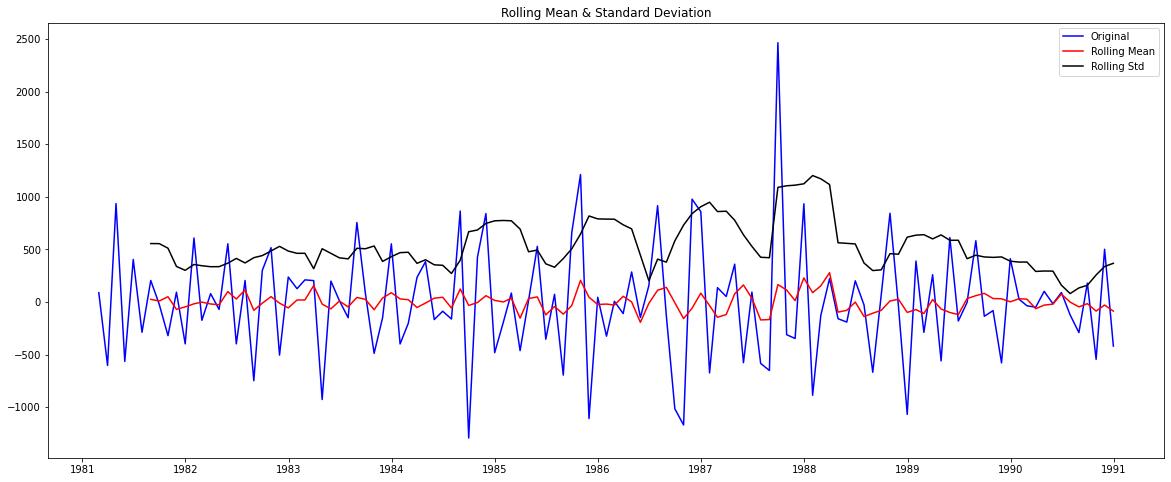

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
dtype: float64 

Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
dtype: float64 

Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [358]:
# Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

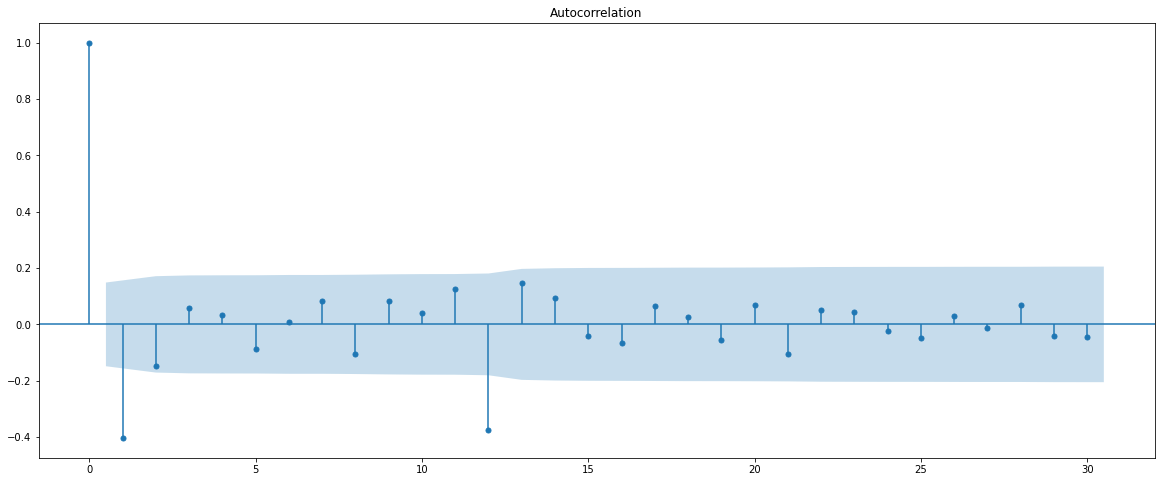

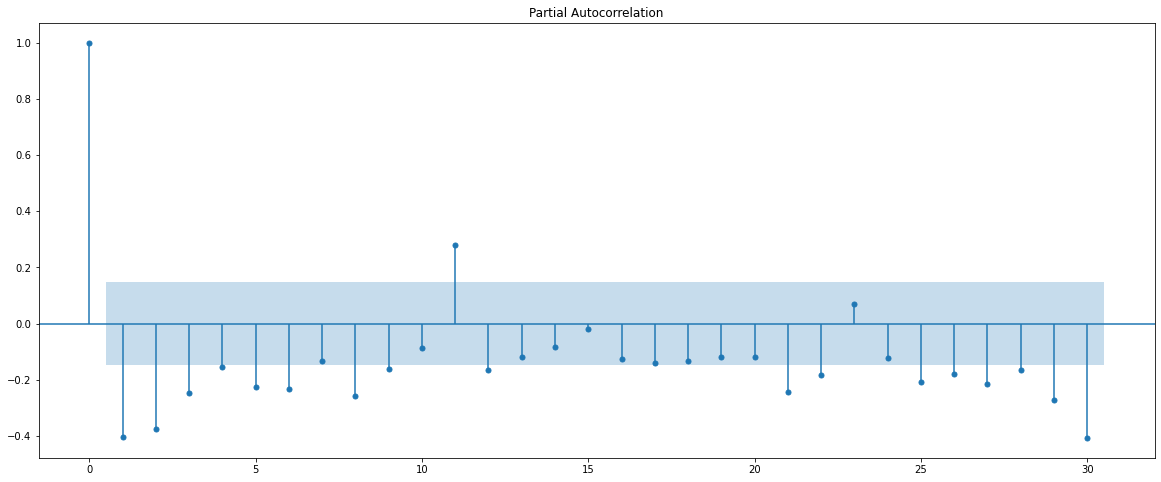

In [359]:
# Checking the ACF and the PACF plots for the new modified Time Series
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [360]:
# We are going to take the seasonal period as 12.

In [361]:
manual_SARIMA_12= sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=(2, 1, 2),
 seasonal_order=(2, 0, 2, 12),
 enforce_stationarity=False,
 enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.920
Date:                            Thu, 28 Oct 2021   AIC                           1557.840
Time:                                    19:17:04   BIC                           1581.640
Sample:                                         0   HQIC                          1567.482
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6602      0.287     -2.300      0.021      -1.223      -0.098
ar.L2         -0.0621      0.155   

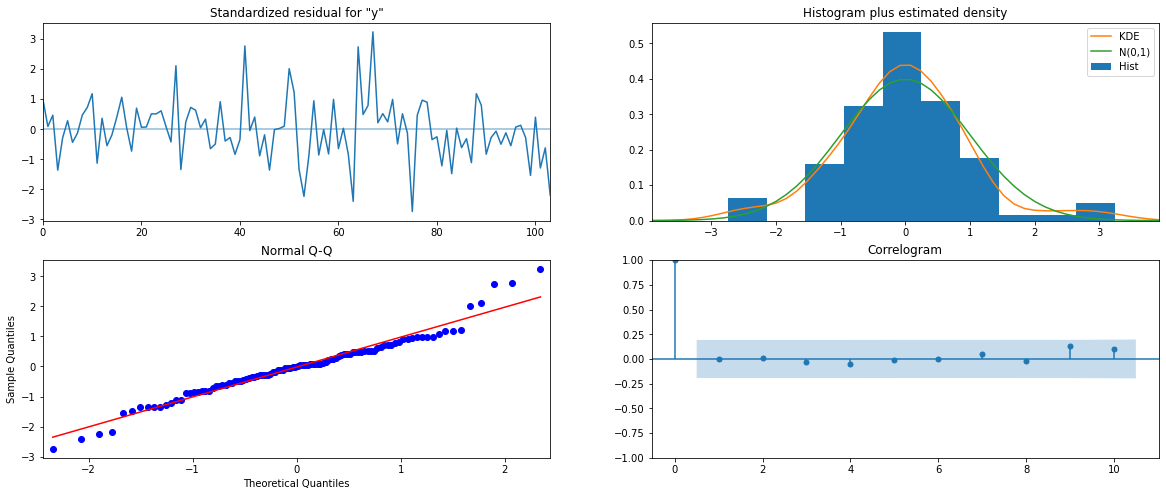

In [362]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [183]:
# Predict on the Test Set using this model and evaluate the model.

In [363]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [364]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1311.826675,389.899488,547.637721,2076.015628
1,1300.651859,400.572863,515.543475,2085.760243
2,1562.780641,400.600108,777.618856,2347.942426
3,1567.089134,408.005644,767.412766,2366.765502
4,1344.581341,409.042152,542.873455,2146.289228


In [365]:
# RMSE Score
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

580.6029005672854


In [366]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['SARIMA(2,1,2)(2,0,2,12)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF

,RMSE
"ARIMA(0,1,2)",1417.502239
"SARIMA(0,1,2)(2,0,2,12)",526.462879
"SARIMA(2,1,2)(2,0,2,12)",580.602901


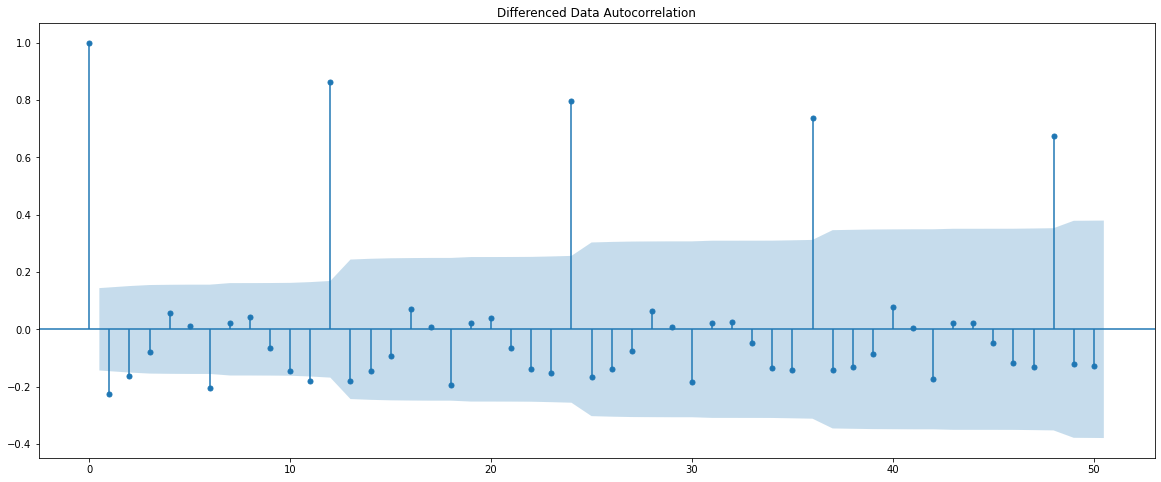

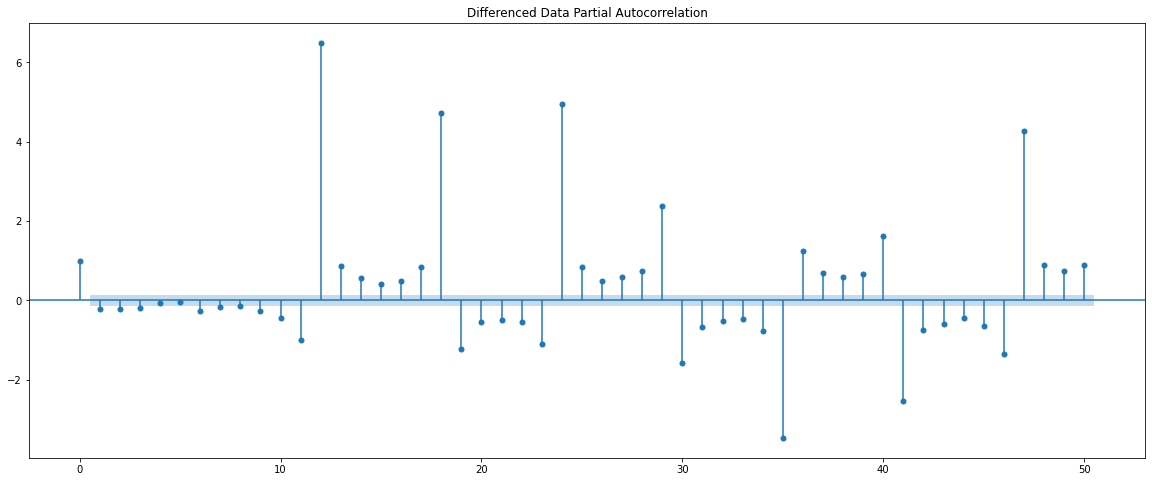

In [367]:
# Manual ARIMA model
###Let us look once agin ACF and PACF plots
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [368]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(2,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.629
Date:                Thu, 28 Oct 2021   AIC                           2210.619
Time:                        19:17:52   BIC                           2227.870
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5856      0.517     10.809      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [369]:
# Predict on the Test Set using this model and evaluate the model
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [370]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.6638702744171


In [371]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
 ,index=['ARIMA(2,1,2)'])
results_DF = pd.concat([results_DF,temp_resultsDf])
results_DF


,RMSE
"ARIMA(0,1,2)",1417.502239
"SARIMA(0,1,2)(2,0,2,12)",526.462879
"SARIMA(2,1,2)(2,0,2,12)",580.602901
"ARIMA(2,1,2)",1374.663870


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [372]:
results_DF = results_DF.rename(columns={'RMSE':'Test_RMSE'})

In [373]:
results_DF

,Test_RMSE
"ARIMA(0,1,2)",1417.502239
"SARIMA(0,1,2)(2,0,2,12)",526.462879
"SARIMA(2,1,2)(2,0,2,12)",580.602901
"ARIMA(2,1,2)",1374.663870


In [375]:
Final_Model_results=pd.concat([result_DF,results_DF])
Final_Model_results

,Train_RMSE,Test_RMSE
RegressionOnTime,1279.322346,1389.135175
Naive Model,3867.700802,3864.279352
Simple Average,1298.483628,1275.081804
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1372.054747,3855.940897
"Alpha=0.3,SimpleExponentialSmoothing",1338.805381,1935.507132
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1500.689062,18259.110704


In [376]:
Final_Model_results.sort_values(by=['Test_RMSE'],ascending=True)

,Train_RMSE,Test_RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing",404.513320,392.786198
"Alpha=0.064,Beta=0.053,Gamma=0.0,TripleExponentialSmoothing",356.782453,463.501976
"SARIMA(0,1,2)(2,0,2,12)",NaN,526.462879
"SARIMA(2,1,2)(2,0,2,12)",NaN,580.602901
2pointTrailingMovingAverage,NaN,813.400684
4pointTrailingMovingAverage,NaN,1156.589694
Simple Average,1298.483628,1275.081804
6pointTrailingMovingAverage,NaN,1283.927428
9pointTrailingMovingAverage,NaN,1346.278315
"ARIMA(2,1,2)",NaN,1374.663870


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [378]:
TES_Final=df.copy()

In [379]:
model_TES=ExponentialSmoothing(TES_Final['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [380]:
model_TES_autofit = model_TES.fit()

In [381]:
model_TES_autofit.params

{'smoothing_level': 0.07543819037108564,
 'smoothing_trend': 0.07543816249429056,
 'smoothing_seasonal': 0.27294445154459185,
 'damping_trend': nan,
 'initial_level': 1577.446620339965,
 'initial_trend': -13.373823757745805,
 'initial_seasons': array([1.06875929, 1.02018982, 1.47799192, 1.19853279, 0.98227378,
        0.9560861 , 1.32099751, 1.70927388, 1.39014226, 1.89705741,
        2.90535421, 3.77843847]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [382]:
TES_Final['auto']=model_TES_autofit.fittedvalues
TES_Final

,Sparkling,auto
Time_Stamp,,
1980-01-31,1686,1671.617328
1980-02-29,1591,1583.121137
1980-03-31,2304,2274.807027
1980-04-30,1712,1830.721948
1980-05-31,1471,1479.591147
...,...,...
1995-03-31,1897,1793.402741
1995-04-30,1862,1758.427033
1995-05-31,1670,1632.914189


In [383]:
TES_Future= model_TES_autofit.forecast(steps=12)
TES_Future

1995-08-31    1929.565002
1995-09-30    2347.047048
1995-10-31    3172.507937
1995-11-30    3909.340833
1995-12-31    5969.868543
1996-01-31    1353.953302
1996-02-29    1593.630283
1996-03-31    1824.817614
1996-04-30    1784.274585
1996-05-31    1635.069228
1996-06-30    1549.085128
1996-07-31    1955.711909
Freq: M, dtype: float64

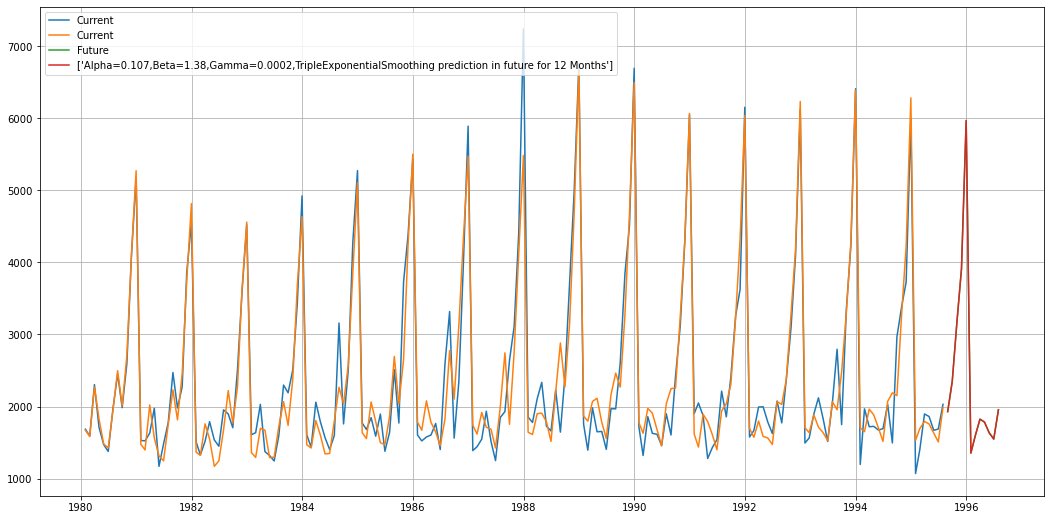

In [384]:
# Plotting The Forecast with Confidence Bond
plt.figure(figsize=(18,9))
plt.plot(TES_Final,label='Current')
plt.plot(TES_Future,label='Future')
plt.plot(TES_Future, label=['Alpha=0.107,Beta=1.38,Gamma=0.0002,TripleExponentialSmoothing prediction in future for 12 Months'])
plt.legend(loc='best')
plt.grid();

In [385]:
# Final Result
rmse= metrics.mean_squared_error(TES_Final['Sparkling'],TES_Final['auto'],squared=False)
print('For Alpha=0.107,Beta=1.38,Gamma=0.0002 , Triple exponential Smoothing model Forecasting',rmse)

For Alpha=0.107,Beta=1.38,Gamma=0.0002 , Triple exponential Smoothing model Forecasting 346.1249703143661


<AxesSubplot:xlabel='Time_Stamp'>

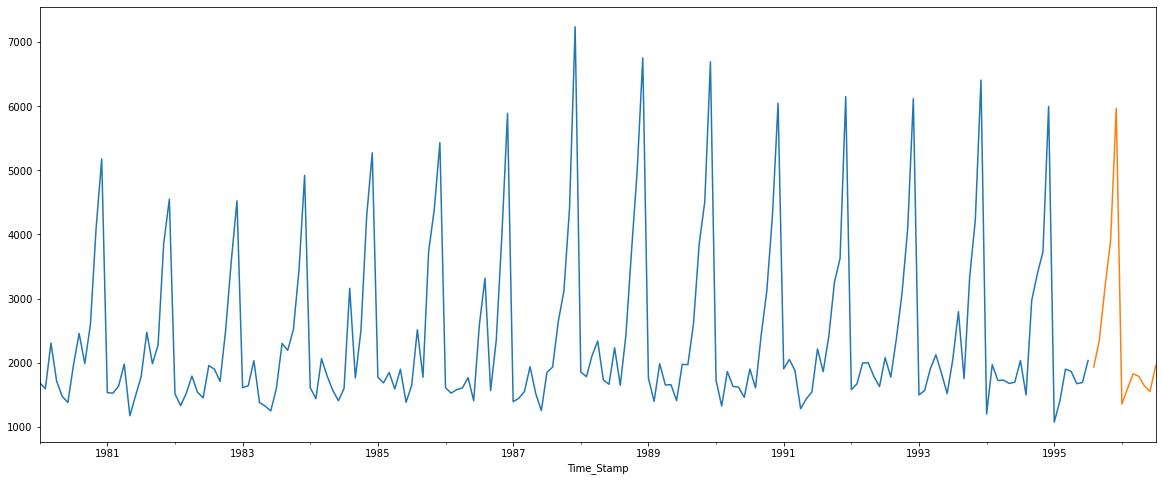

In [386]:
# Predicted Model for the Sparkling Sales for final Model
TES_Final['Sparkling'].plot()
TES_Future.plot()

In [387]:
TES_Final_1=pd.DataFrame({'lower_CI':TES_Future - ((np.percentile(TES_Future,[2.5,97.5])))[0],
                         'Forecasting': TES_Future,
                         'upper_CI': TES_Future + ((np.percentile(TES_Future,[2.5,97.5])))[1]})

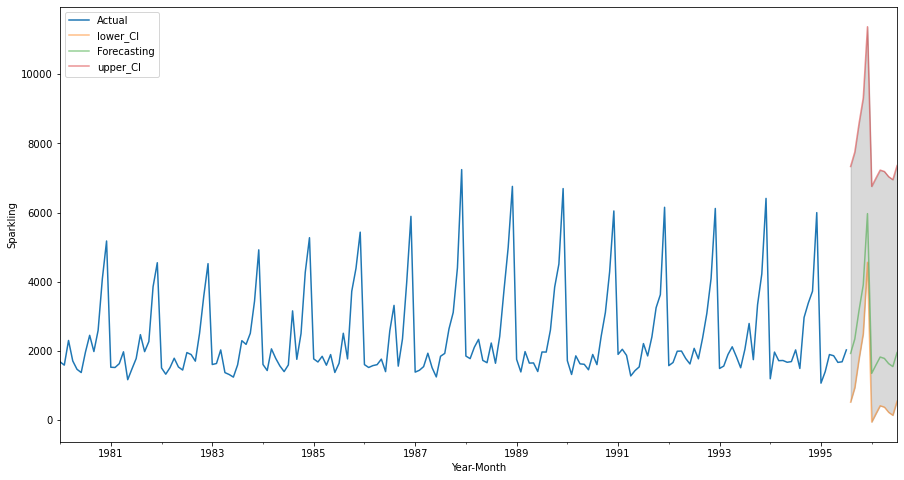

In [388]:
axis=df['Sparkling'].plot(label='Actual',figsize=(15,8))
TES_Final_1.plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(TES_Final_1.index, TES_Final_1['lower_CI'],TES_Final_1['upper_CI'],color='k',alpha=.15)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show();